# WeatherPy

---

## Maria's work to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    #print (city_url) #checking

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()
        #print(city_json) #DEBUGGING: SEE THE LIBRARY BEFORE CONTINUING!!
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        print (city)
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]
   
        #Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    #print (city_data)
    #break
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port glaud
City not found. Skipping...
Processing Record 2 of Set 1 | port-aux-francais
port-aux-francais
Processing Record 3 of Set 1 | wangdue phodrang
wangdue phodrang
Processing Record 4 of Set 1 | kailua-kona
kailua-kona
Processing Record 5 of Set 1 | la romana
la romana
Processing Record 6 of Set 1 | kingaroy
kingaroy
Processing Record 7 of Set 1 | grytviken
grytviken
Processing Record 8 of Set 1 | la sarre
la sarre
Processing Record 9 of Set 1 | ust-nera
ust-nera
Processing Record 10 of Set 1 | mahibadhoo
mahibadhoo
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | tolanaro
tolanaro
Processing Record 13 of Set 1 | olonkinbyen
olonkinbyen
Processing Record 14 of Set 1 | birao
birao
Processing Record 15 of Set 1 | adamstown
adamstown
Processing Record 16 of Set 1 | yellowknife
yellowknife
Processing Record 17 of Set 1 | christchurch
christchu

marica
Processing Record 1 of Set 4 | afaahiti
afaahiti
Processing Record 2 of Set 4 | beteza
City not found. Skipping...
Processing Record 3 of Set 4 | jamestown
jamestown
Processing Record 4 of Set 4 | lyantor
lyantor
Processing Record 5 of Set 4 | udachny
udachny
Processing Record 6 of Set 4 | st. john's
st. john's
Processing Record 7 of Set 4 | lata
lata
Processing Record 8 of Set 4 | isangel
isangel
Processing Record 9 of Set 4 | souillac
souillac
Processing Record 10 of Set 4 | porto belo
porto belo
Processing Record 11 of Set 4 | goroka
goroka
Processing Record 12 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 13 of Set 4 | santana
santana
Processing Record 14 of Set 4 | acajutla
acajutla
Processing Record 15 of Set 4 | lihue
lihue
Processing Record 16 of Set 4 | galle
galle
Processing Record 17 of Set 4 | urucara
urucara
Processing Record 18 of Set 4 | howrah
howrah
Processing Record 19 of Set 4 | okakarara
okakarara
Processing Record 20 of Set 4 | h

City not found. Skipping...
Processing Record 13 of Set 7 | tucumcari
tucumcari
Processing Record 14 of Set 7 | puerto aysen
puerto aysen
Processing Record 15 of Set 7 | morant bay
morant bay
Processing Record 16 of Set 7 | dukhan
dukhan
Processing Record 17 of Set 7 | dedza
dedza
Processing Record 18 of Set 7 | codrington
codrington
Processing Record 19 of Set 7 | chatham
chatham
Processing Record 20 of Set 7 | pangkalanbuun
pangkalanbuun
Processing Record 21 of Set 7 | ahmadpur
ahmadpur
Processing Record 22 of Set 7 | sabzevar
sabzevar
Processing Record 23 of Set 7 | farkhar
farkhar
Processing Record 24 of Set 7 | moncks corner
moncks corner
Processing Record 25 of Set 7 | vila franca do campo
vila franca do campo
Processing Record 26 of Set 7 | usogorsk
usogorsk
Processing Record 27 of Set 7 | mana
mana
Processing Record 28 of Set 7 | pangody
pangody
Processing Record 29 of Set 7 | hanzhong
hanzhong
Processing Record 30 of Set 7 | brokopondo
brokopondo
Processing Record 31 of Set 7 

City not found. Skipping...
Processing Record 21 of Set 10 | kristiansund
kristiansund
Processing Record 22 of Set 10 | la paz
la paz
Processing Record 23 of Set 10 | wang noi
wang noi
Processing Record 24 of Set 10 | leava
leava
Processing Record 25 of Set 10 | broken hill
broken hill
Processing Record 26 of Set 10 | balakhta
balakhta
Processing Record 27 of Set 10 | tangalle
tangalle
Processing Record 28 of Set 10 | kencong
kencong
Processing Record 29 of Set 10 | china
china
Processing Record 30 of Set 10 | pacific grove
pacific grove
Processing Record 31 of Set 10 | zheleznogorsk
zheleznogorsk
Processing Record 32 of Set 10 | al jawf
al jawf
Processing Record 33 of Set 10 | novyy turtkul'
novyy turtkul'
Processing Record 34 of Set 10 | conde
conde
Processing Record 35 of Set 10 | retreat
retreat
Processing Record 36 of Set 10 | kathu
kathu
Processing Record 37 of Set 10 | troitsko-pechorsk
troitsko-pechorsk
Processing Record 38 of Set 10 | sittwe
sittwe
Processing Record 39 of Set 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,273.51,64,95,11.79,TF,1697332081
1,wangdue phodrang,27.4862,89.8991,290.47,90,66,0.38,BT,1697332081
2,kailua-kona,19.6406,-155.9956,302.92,77,20,4.63,US,1697331999
3,la romana,18.4273,-68.9728,299.35,94,20,0.00,DO,1697332081
4,kingaroy,-26.5333,151.8333,302.98,19,0,2.20,AU,1697331823


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,273.51,64,95,11.79,TF,1697332081
1,wangdue phodrang,27.4862,89.8991,290.47,90,66,0.38,BT,1697332081
2,kailua-kona,19.6406,-155.9956,302.92,77,20,4.63,US,1697331999
3,la romana,18.4273,-68.9728,299.35,94,20,0.00,DO,1697332081
4,kingaroy,-26.5333,151.8333,302.98,19,0,2.20,AU,1697331823


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

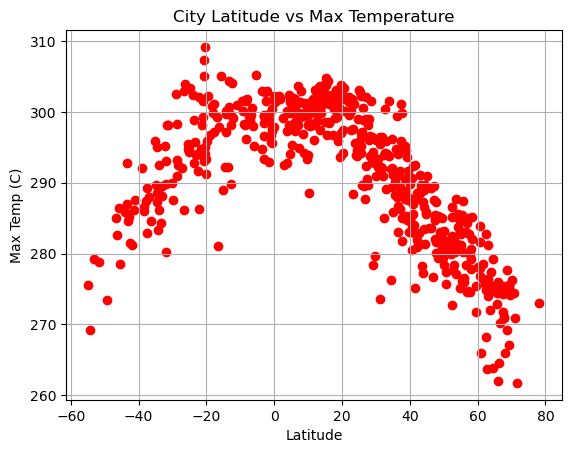

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", color = 'r')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

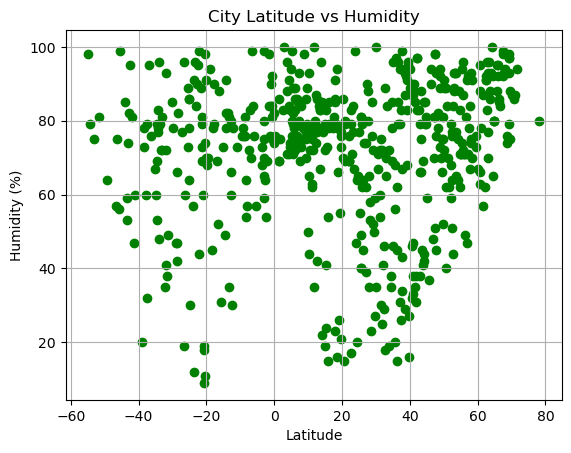

In [22]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o",color ='g')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

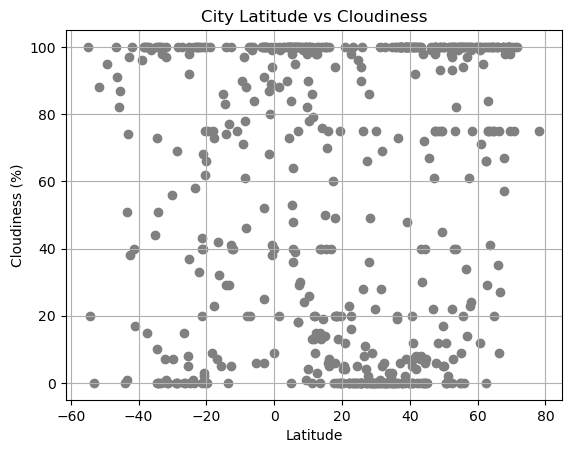

In [17]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o",color = "gray")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

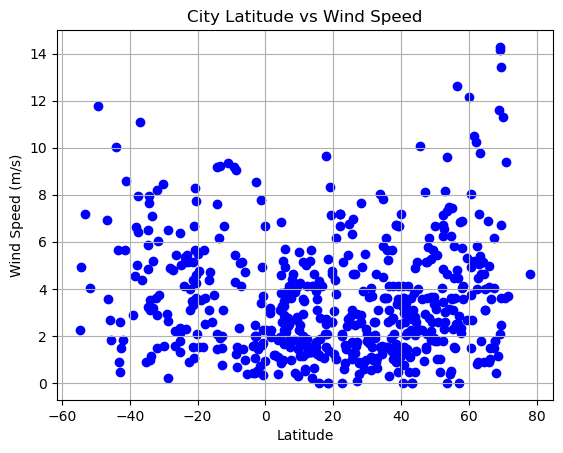

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o",color = 'b')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# HEY KOURT!!! LET"S WRITE A FUNCTION TOGETHER:) Define a function to create Linear Regression plots
#
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
#how do we label the line with the linear regression equation?
plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wangdue phodrang,27.4862,89.8991,290.47,90,66,0.38,BT,1697332081
2,kailua-kona,19.6406,-155.9956,302.92,77,20,4.63,US,1697331999
3,la romana,18.4273,-68.9728,299.35,94,20,0.00,DO,1697332081
6,la sarre,48.8002,-79.1996,279.47,89,100,5.27,CA,1697332082
7,ust-nera,64.5667,143.2000,263.83,92,100,0.89,RU,1697331829


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,273.51,64,95,11.79,TF,1697332081
4,kingaroy,-26.5333,151.8333,302.98,19,0,2.20,AU,1697331823
5,grytviken,-54.2811,-36.5092,269.23,79,20,4.93,GS,1697332082
9,tolanaro,-25.0319,46.9987,295.16,86,92,1.33,MG,1697332082
12,adamstown,-25.0660,-130.1015,294.69,78,98,2.34,PN,1697332083


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.796576


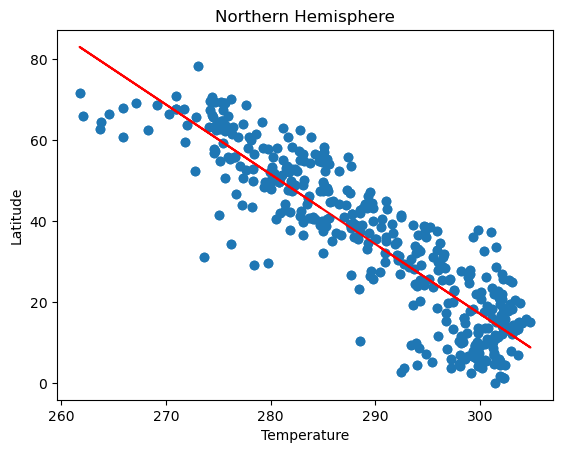

In [39]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Max Temp"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Temperature')
plt.ylabel('Latitude')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.show()

R-squared: 0.533156


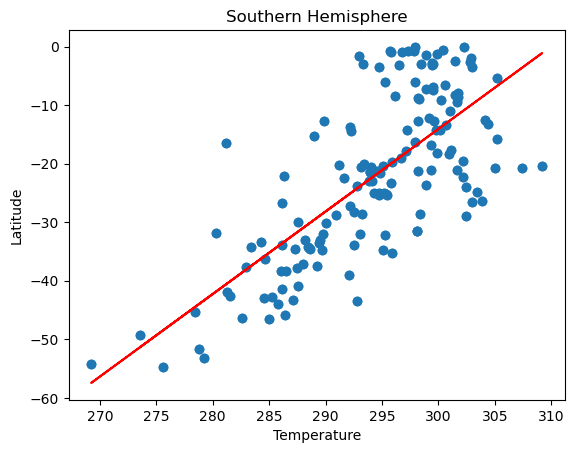

In [43]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Max Temp"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Temperature')
plt.ylabel('Latitude')

#replace with function
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.020670


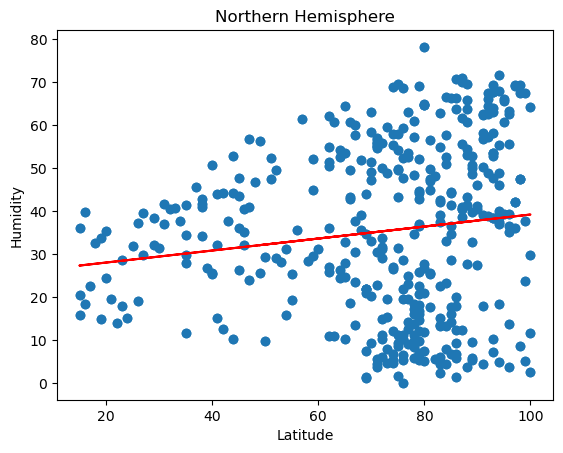

In [41]:
# Northern Hemisphere
x = northern_hemi_df["Humidity"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.show()

R-squared: 0.006126


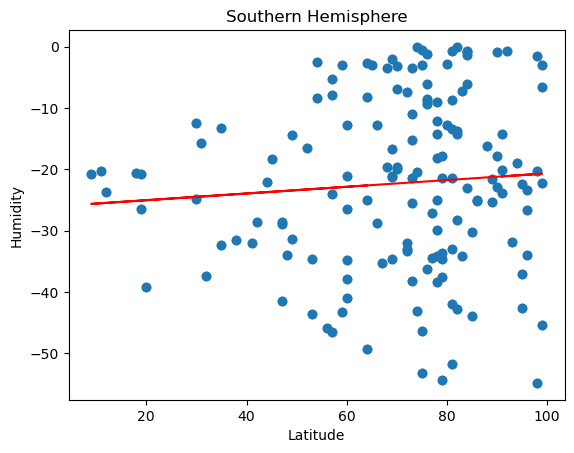

In [42]:
# Southern Hemisphere
x = southern_hemi_df["Humidity"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.024385


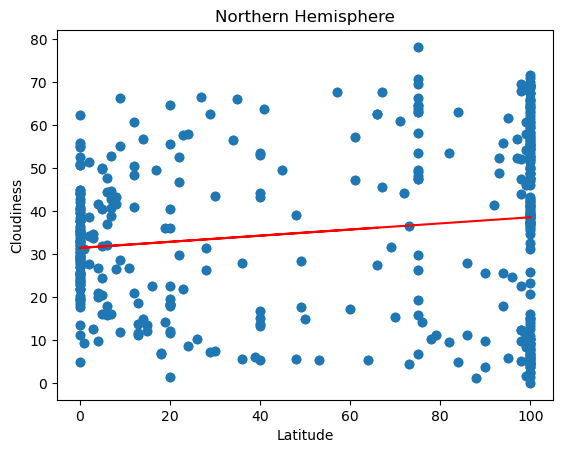

In [44]:
# Northern Hemisphere
x = northern_hemi_df["Cloudiness"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.show()

R-squared: 0.006608


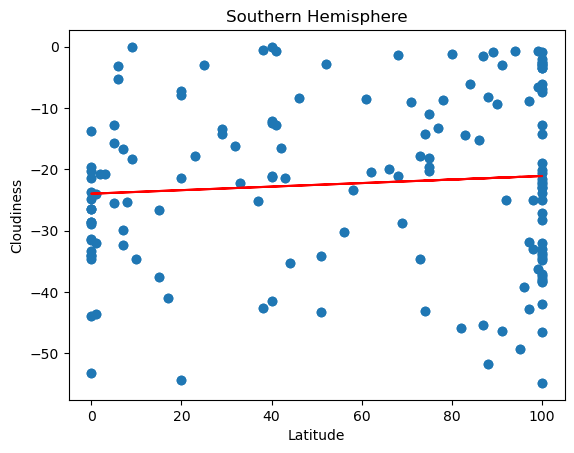

In [45]:
# Southern Hemisphere
x = southern_hemi_df["Cloudiness"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.079539


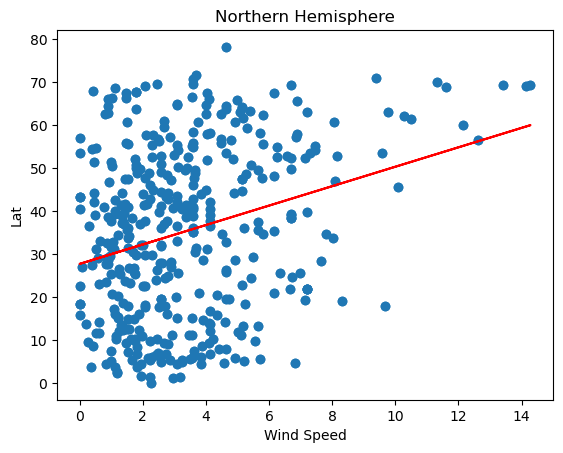

In [47]:
# Northern Hemisphere
x = northern_hemi_df["Wind Speed"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.show()

R-squared: 0.052834


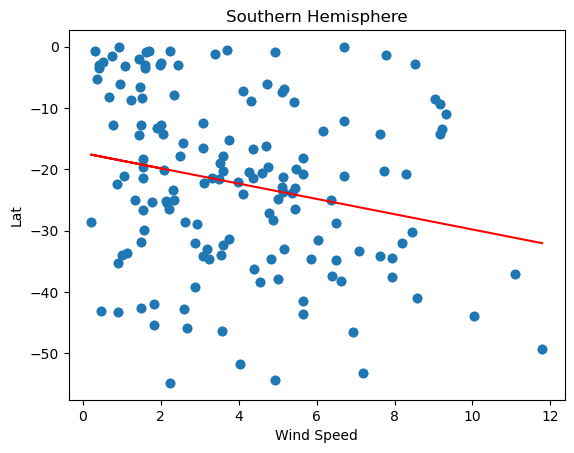

In [48]:
# Southern Hemisphere
x = southern_hemi_df["Wind Speed"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE